In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n = 100 #number of observations
p = 8 #number of parameters (dimension of B)
alpha = 2
v = 3

B is generated from a normal distribution centered at 0 with standard variation 1/alpha.

In [ ]:
B = np.random.normal(0, 1/alpha, size=(p, 1))
B

array([[-0.80681578],
       [-0.10341895],
       [-0.24376109],
       [-0.42938099],
       [ 0.48235228],
       [-0.5998461 ],
       [-0.38547746],
       [ 0.0907456 ]])

Here, we generate design matrix X with bias term.

In [ ]:
X = np.random.normal(10, 8, size=(n, p-1))
X0 = np.ones((n,1))
X = np.hstack((X0, X))
X.shape

(100, 8)

Here, E is the noise term, which we generate from another normal distribution centered at 0 with variance 1/nu.

In [ ]:
E = np.random.normal(0, 1/v, size=(n, 1))
E.shape

(100, 1)

In [ ]:
Y = X@B + E
Y.shape

(100, 1)

We know from the empirical bayes, log(alpha,nu) is proportional to log|nu\*I + 1/alpha\*XXT|+YT(nu\*I+1/alpha*XXT). Therefore we create the function, negative_log_Likelihood, to compute the value of this empirical function each time the alpha and nu updated. Then, we get the optimum alpha and nu when the empirical function reaches the minimum value.

In [ ]:
def negative_log_likelihood(params, Y, X):
    a, v = params  # These are the parameters we want to optimize: a and v

    # Step 1: Calculate the covariance matrix based on a and X
    n = Y.shape[0]  # Number of data points
    I = np.identity(n)  # Identity matrix of size n x n
    cov_matrix = v * I + (1/a) * np.dot(X, X.T)
    #cov_matrix += 1e-5 * np.identity(n)

    # Step 2: Compute the log-likelihood directly
    log_likelihood = -0.5 * (n * np.log(2 * np.pi) + np.log(np.linalg.det(cov_matrix)) + np.dot(np.dot(Y.T, np.linalg.inv(cov_matrix)), Y))
    print(-log_likelihood)
    # Step 3: Return the negative log-likelihood (for minimization)
    return -log_likelihood

We perform gradient descent and find the optimum alpha and nu

In [ ]:
def gradient(params, Y, X):
  alpha, v = params
  n = Y.shape[0]
  I = np.identity(n)
  cov_matrix = v * I + 1 / alpha * X @ X.T
  inv_cov_matrix = np.linalg.inv(cov_matrix)

  # Gradient with respect to 'a'
  gradient_a = -0.5 * (np.trace(inv_cov_matrix) - np.dot(np.dot(Y.T, inv_cov_matrix), Y))

  # Gradient with respect to 'v'
  gradient_v = -0.5 * (np.trace(inv_cov_matrix) - n)

  return np.array([gradient_a, gradient_v])

In [ ]:
# Hyperparameters for gradient descent
learning_rate = 0.001
max_iterations = 10000
tolerance = 1e-6

# Initial parameter values
a = 1
v = 1

for iteration in range(max_iterations):
    # Compute the gradient
    grad = gradient([a, v], Y, X)

    # Update parameters using gradient ascent
    a += learning_rate * grad[0]
    v += learning_rate * grad[1]

    # Convergence check
    if np.max(np.abs(grad)) < tolerance:
        break

print(f"Estimated 'a': {a}")
print(f"Estimated 'v': {v}")

<ipython-input-8-9d96efa0d43e>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([gradient_a, gradient_v])


Estimated 'a': [[167.01824301]]
Estimated 'v': 492.92695583763646


In [ ]:
initial_guess = [1.0, 1.0]

In [ ]:
constraints = ({'type': 'ineq', 'fun': lambda x: x[0]},
               {'type': 'ineq', 'fun': lambda x: x[1]})


In [ ]:
from scipy.optimize import minimize


In [ ]:
result = minimize(negative_log_likelihood, initial_guess, args=(Y, X), constraints=constraints)

[[131.2923908]]
[[131.29239075]]
[[131.2923914]]
[[-inf]]
[[-inf]]
[[-inf]]


<ipython-input-7-9e35c8e4a495>:11: RuntimeWarning: divide by zero encountered in log
  log_likelihood = -0.5 * (n * np.log(2 * np.pi) + np.log(np.linalg.det(cov_matrix)) + np.dot(np.dot(Y.T, np.linalg.inv(cov_matrix)), Y))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [ ]:
result.x

array([4.26884270e+00, 1.17950094e-11])

In [ ]:
p

8

In [ ]:
p1 =np.linalg.inv((alpha*np.identity(p))+(1/v*np.dot(X.T,X)))

In [ ]:
p2 = np.linalg.inv((45.88378585*np.identity(p))+(1/492.77257717288825*np.dot(X.T,X)))

In [ ]:
d1 = 1/v*np.dot(p1, np.dot(X.T,Y))

In [ ]:
d2 = 1/492.77257717288825*np.dot(p1, np.dot(X.T,Y))

Text(0, 0.5, 'B estimate')

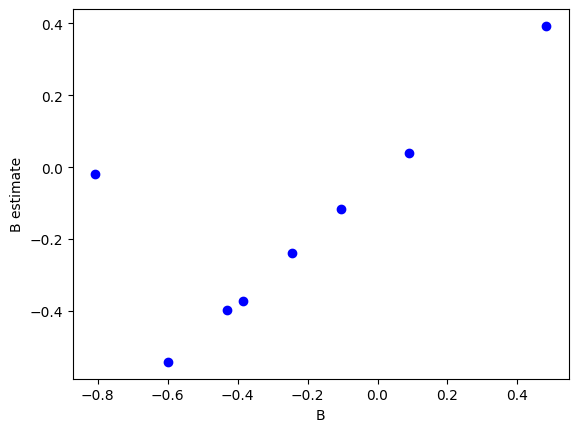

In [ ]:
plt.scatter(B, d2, c ="blue")
plt.xlabel("B")
plt.ylabel("B estimate")